In [1]:
%matplotlib inline
from pathlib import Path
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('white')
pd.set_option('float_format', '{:,.2f}'.format)
np.random.seed(42)
analogy_path = Path('data', 'analogies-en.txt')

def format_time(t):
    m, s = divmod(t, 60)
    h, m = divmod(m, 60)
    return f'{h:02.0f}:{m:02.0f}:{s:02.0f}'

In [3]:
# Evaluation: Analogies
df = pd.read_csv(analogy_path, header=None, names=['category'], squeeze=True)
categories = df[df.str.startswith(':')]
analogies = df[~df.str.startswith(':')].str.split(expand=True)
analogies.columns = list('abcd')
df = pd.concat([categories, analogies], axis=1)
df.category = df.category.ffill()
df = df[df['a'].notnull()]
df.head()

C:\Users\19498\AppData\Local\Temp\ipykernel_24748\3055656098.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = pd.read_csv(analogy_path, header=None, names=['category'], squeeze=True)


,category,a,b,c,d
1,: gram9-plural-verbs,athens,greece,baghdad,iraq
2,: gram9-plural-verbs,athens,greece,bangkok,thailand
3,: gram9-plural-verbs,athens,greece,beijing,china
4,: gram9-plural-verbs,athens,greece,berlin,germany
5,: gram9-plural-verbs,athens,greece,bern,switzerland


In [6]:
df.sample(10)

,category,a,b,c,d
9392,: gram9-plural-verbs,jacksonville,florida,portland,oregon
2273,: gram9-plural-verbs,bucharest,romania,bratislava,slovakia
25190,: gram9-plural-verbs,speak,speaks,search,searches
1165,: gram9-plural-verbs,ashgabat,turkmenistan,belgrade,serbia
14557,: gram9-plural-verbs,son,daughter,groom,bride
3424,: gram9-plural-verbs,dushanbe,tajikistan,paramaribo,suriname
12508,: gram9-plural-verbs,fremont,california,tacoma,washington
9296,: gram9-plural-verbs,phoenix,arizona,orlando,florida
12403,: gram9-plural-verbs,irving,texas,jacksonville,florida
17257,: gram9-plural-verbs,quick,quicker,high,higher


In [9]:
df.groupby('category').size().sort_values(ascending=True)

category
: gram9-plural-verbs      25392
dtype: int64

In [7]:
analogy_cnt = df.groupby('category').size().sort_values(ascending=False).to_frame('n')
analogy_example = df.groupby('category').first()

analogy_cnt.join(analogy_example)

,n,a,b,c,d
category,,,,,
: gram9-plural-verbs,25392,athens,greece,baghdad,iraq


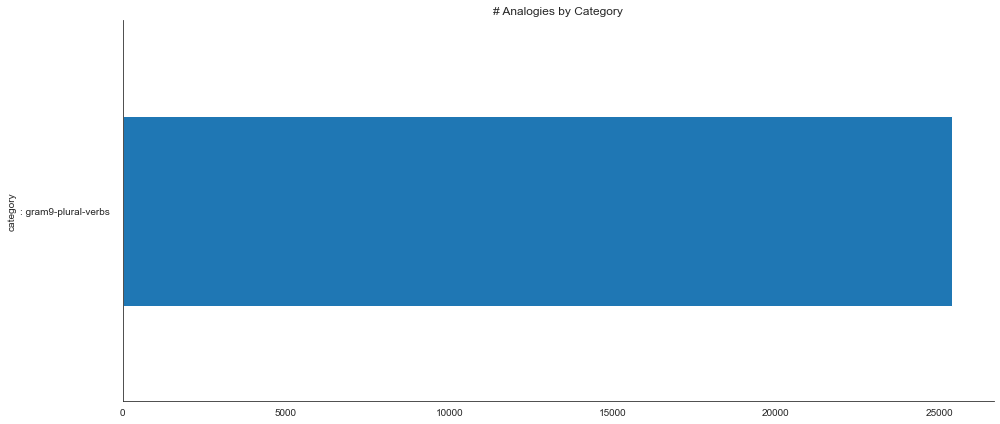

In [5]:
analogy_cnt.join(analogy_example)['n'].sort_values().plot.barh(title='# Analogies by Category', figsize=(14, 6))
sns.despine()
plt.tight_layout()

# since 1 category data, stop here